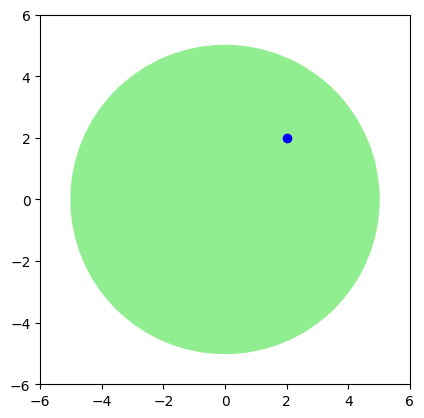

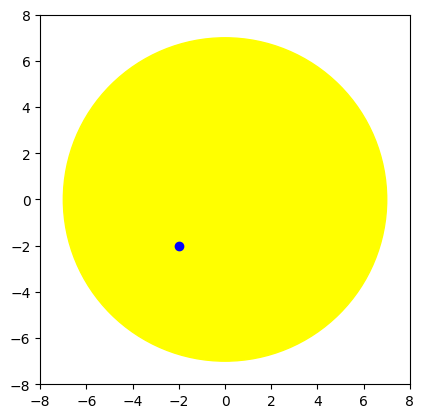

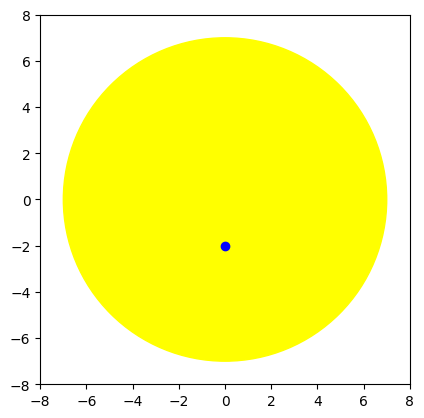

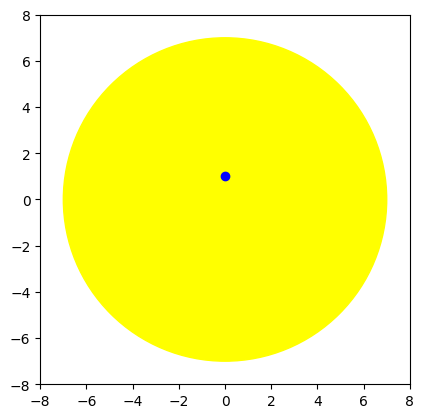

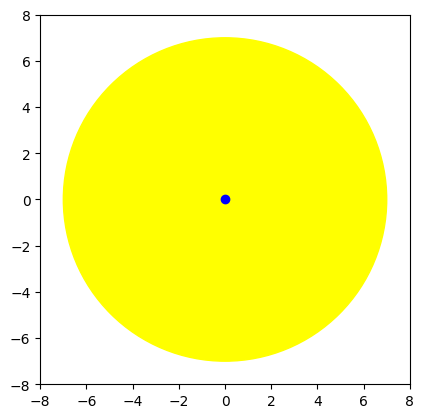

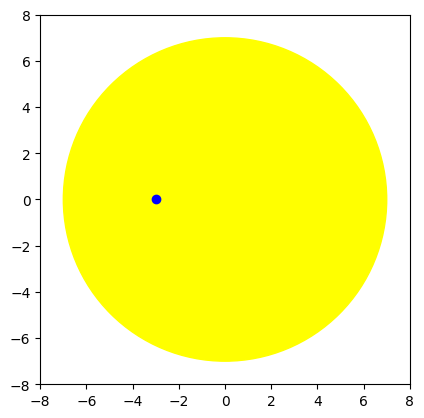

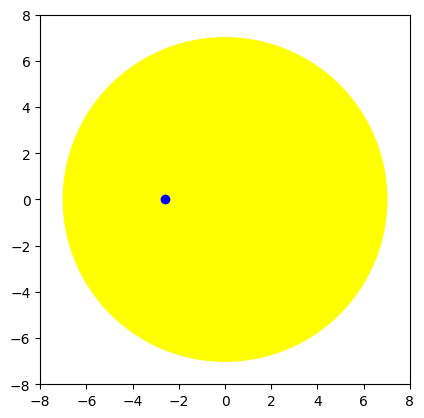

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

class Escena:
    def __init__(self, radio=1, punto=np.array([0.0, 0.0]), color='lightblue'):
        self.radio = radio
        self.punto = np.array(punto, dtype=float)  # Aseguramos que sea tipo float
        self.color = color

    def dibujar(self):
        fig, ax = plt.subplots()

        # Dibuja la circunferencia
        circ = plt.Circle((0, 0), self.radio, color=self.color, fill=True)
        ax.add_patch(circ)

        # Dibuja el punto
        ax.plot(self.punto[0], self.punto[1], 'bo')  # b=blue(azul) y o=circulo

        # Configurar los límites
        ax.set_xlim(-self.radio - 1, self.radio + 1)
        ax.set_ylim(-self.radio - 1, self.radio + 1)
        ax.set_aspect('equal')
        plt.show()


    def crear_escena(radio, color, punto):
        return Escena(radio=radio, punto=np.array(punto, dtype=float), color=color)

    def cambiar_escena(self, radio=None, color=None, punto=None):
        if radio is not None:
            self.radio = radio
        if color is not None:
            self.color = color
        if punto is not None:
            self.punto = np.array(punto, dtype=float)  # Aseguramos que el nuevo punto sea tipo float

    def dibujar_escena(self):
        self.dibujar()

    def desplazar_punto(self, valor, direccion):
        desplazamientos = {
            'derecha': np.array([float(valor), 0.0]),
            'izquierda': np.array([-float(valor), 0.0]),
            'arriba': np.array([0.0, float(valor)]),
            'abajo': np.array([0.0, -float(valor)]),
        }

        if direccion in desplazamientos:
            # Se actualiza la posición del punto sumando el desplazamiento
            self.punto += desplazamientos[direccion]
        else:
            raise ValueError("Dirección no válida. Usa 'derecha', 'izquierda', 'arriba' o 'abajo'.")

    def validar_posicion(self):
        # Validamos si el punto está dentro del círculo
        if np.linalg.norm(self.punto) > self.radio:
            # Si está fuera del círculo, lo movemos a la frontera más cercana
            self.punto = self.punto / np.linalg.norm(self.punto) * self.radio

    def simular(self, velocidad, direccion, pasos=50):
        desplazamientos = {
            'derecha': np.array([float(velocidad), 0.0]),
            'izquierda': np.array([-float(velocidad), 0.0]),
            'arriba': np.array([0.0, float(velocidad)]),
            'abajo': np.array([0.0, -float(velocidad)]),
        }

        if direccion not in desplazamientos:
            raise ValueError("Dirección no válida. Usa 'derecha', 'izquierda', 'arriba' o 'abajo'.")

        fig, ax = plt.subplots()
        ax.set_xlim(-self.radio - 1, self.radio + 1)
        ax.set_ylim(-self.radio - 1, self.radio + 1)
        ax.set_aspect('equal')

        circ = plt.Circle((0, 0), self.radio, color=self.color, fill=True)
        ax.add_patch(circ)

        # Aquí creamos el objeto de la línea del punto para animación
        punto, = ax.plot([self.punto[0]], [self.punto[1]], 'bo')  # 'bo' indica punto azul

        def actualizar(frame):
            # Se actualiza la posición del punto según la dirección
            self.punto += desplazamientos[direccion]
            self.validar_posicion()
            # Aseguramos que se pase una secuencia para las coordenadas
            punto.set_data([self.punto[0]], [self.punto[1]])
            return punto,

        ani = animation.FuncAnimation(fig, actualizar, frames=pasos, interval=50, blit=True)
        plt.show()

# Crear la escena correctamente antes de usarla
escena = Escena.crear_escena(radio=5, color='lightgreen', punto=[2.0, 2.0])  # Punto como float
escena.dibujar()

# Cambiar parámetros de la escena
escena.cambiar_escena(radio=7, color='yellow', punto=[-2.0, -2.0])
escena.dibujar()

# Desplazar el punto y volver a dibujar
escena.desplazar_punto(2.0, 'derecha')  # Usar float en el valor
escena.dibujar_escena()

escena.desplazar_punto(3.0, 'arriba')  # Usar float en el valor
escena.dibujar_escena()

escena.desplazar_punto(1.0, 'abajo')  # Usar float en el valor
escena.dibujar_escena()

escena.desplazar_punto(3.0, 'izquierda')  # Usar float en el valor
escena.dibujar_escena()

# Simulación del movimiento del punto
escena.simular(velocidad=0.2, direccion='derecha', pasos=10)